# Mountaineers Trip Report Analysis

this proccess a leader activity report from the mountaineers (produced by Sara Ramsey).  

The report had these columns

 * `plone ID`
 * `Contact: Branch`
 * `Last Name`
 * `First Name`
 * `Email`
 * `Activity Role`
 * `Mountaineers Activity: Activity Category`
 * `Mountaineers Activity: Start Date`
 * `Mountaineers Activity: Activity Name`
 * `Mountaineers Activity: Leader`
 * `Mountaineers Activity: Trip Results`

I did some manual processing to remove leaders who were not actually Seattle Branch


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import mtnleaderreport
from pathlib import Path


In [2]:
#
# Set up paths to data directory and report output directory
#
dataDirectory = Path(Path.home(), "Documents/mountaineers/kayak-seattle/leaderactivity")
dataFileName = "Seattle SK Leaders 2018-20v2.csv"
Branch = 'Seattle'
reportDirectory = os.path.join(dataDirectory, "reports")
if not os.path.exists(reportDirectory):
    os.makedirs(reportDirectory)

In [3]:
tripData, earliestDate, latestDate, labelDateRange = mtnleaderreport.loadData(dataDirectory, dataFileName, branch=Branch)


In [ ]:
tripData.info()
#tripData.head(60)


In [ ]:
#
# Define function to plot a graph and save to file.
#
def plotActivity(dataSet, title):
    leaderCounts = dataSet.value_counts()
    maxCount = leaderCounts.max()
    xTicks = [ x for x in range(0,maxCount + 1)]

    ysize = int(len(leaderCounts) / 2) + 2
    leaderCounts.plot.barh(figsize=(25,ysize), title=title, xticks=xTicks, color=(0.3, 0.8, 0.5, 1.0))
    fileName = os.path.join(reportDirectory, f"{title}.jpg")
    print (f"Saving '{fileName}', size {ysize}")
    plt.savefig(fileName)
    plt.show()

In [ ]:
ALL = 'All'

#
# Build list of all leader rolls plus ALL
#
roleList = [ ALL ]
roleList.extend(tripData[mtnleaderreport.H_ACTIVITY_ROLE].unique())

# Iterate on the rolls.
for role in roleList:
    if role != ALL:
        # Select records for that activity role
        rds = tripData.loc[tripData[mtnleaderreport.H_ACTIVITY_ROLE] == role]
    else:
        rds = tripData

    # Build a list of all activity categories and iterate on that.
    categoryList = [ ALL ]
    categoryList.extend(rds[mtnleaderreport.H_ACTIVITY_CATEGORY].unique())
    for category in categoryList:
        if category != ALL:
            # Select records for that category
            cds = rds.loc[rds[mtnleaderreport.H_ACTIVITY_CATEGORY] == category]
        else:
            cds = rds

        # Plot a new data from count of times the leader full name appears.
        plotActivity(cds[mtnleaderreport.H_FULL_NAME], f"{role} + {category} on {labelDateRange}")
       



In [ ]:
plotActivity(tripData[mtnleaderreport.H_ACTIVITY_NAME], "Activities")

Saving '/Users/unger/Documents/mountaineers/kayak-seattle/leaderactivity/reports/As Primary Leader.jpg'


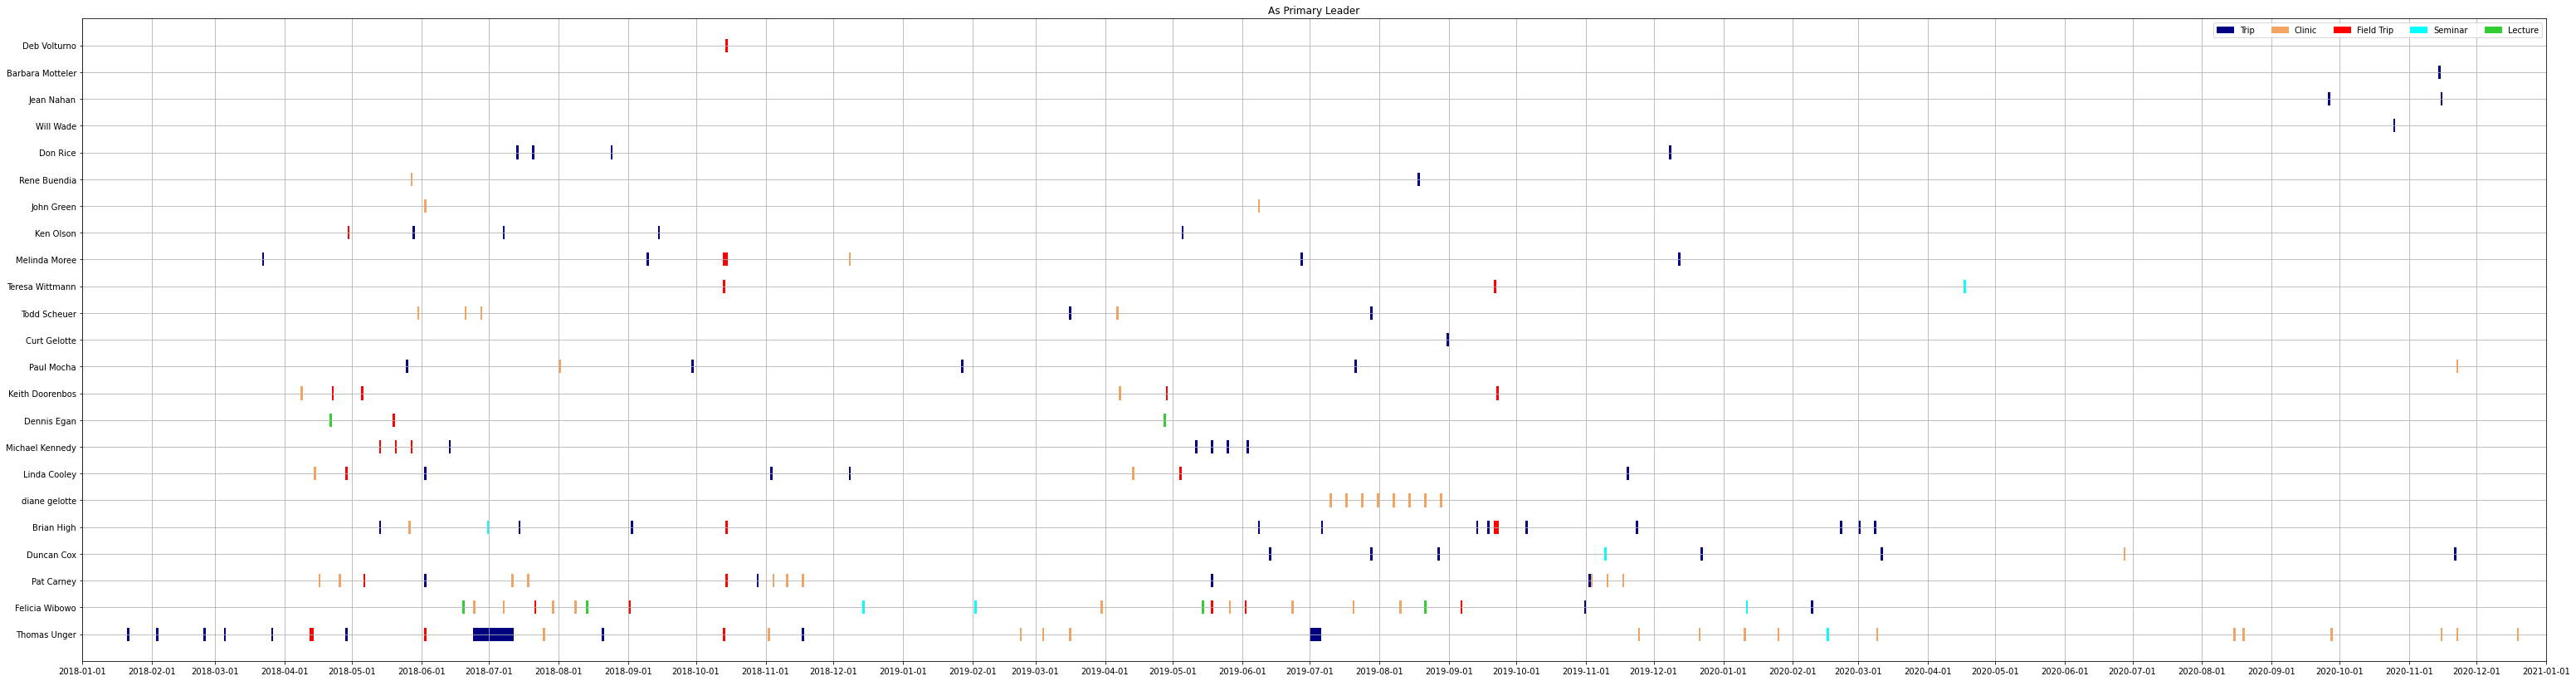

In [5]:
    

#ds_trips = tripData.loc[tripData[mtnleaderreport.H_ACTIVITY_CATEGORY] == 'Trip']
title = 'As Primary Leader'
fileName = os.path.join(reportDirectory, f"{title}.jpg")
dateRange = mtnleaderreport.fullMonthRange(earliestDate, latestDate)
ds_primaryleader = tripData.loc[tripData[mtnleaderreport.H_ACTIVITY_ROLE] == 'Primary leader']
mtnleaderreport.plotTrips(ds_primaryleader, dateRange, title, fileName)

